<a href="https://colab.research.google.com/github/vanessaaleung/visualizations/blob/master/visualizing-covid19/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages
<p>The table below shows the cumulative confirmed cases of COVID-19 worldwide by date. </p>

In [ ]:
library(readr)
library(ggplot2)
library(dplyr)

confirmed_cases_worldwide <- read_csv('datasets/confirmed_cases_worldwide.csv', col_names=TRUE)
head(confirmed_cases_worldwide)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)


date,cum_cases
<date>,<dbl>
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927


## 1. Confirmed cases throughout the world
<p>The y-axis in that plot is pretty scary, with the total number of confirmed cases around the world approaching 200,000. Beyond that, some weird things are happening: there is an odd jump in mid February, then the rate of new cases slows down for a while, then speeds up again in March. We need to dig deeper to see what is happening.</p>

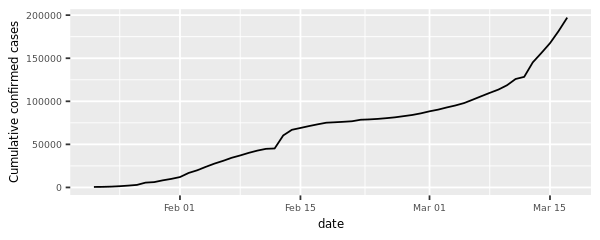

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 2)

ggplot(confirmed_cases_worldwide, aes(x = date, y = cum_cases)) +
  geom_line() +
  ylab("Cumulative confirmed cases") +
  theme(text=element_text(size=7))

## 2. China compared to the rest of the world
<p>The two lines have very different shapes. In February, the majority of cases were in China. That changed in March when it really became a global outbreak: around March 14, the total number of cases outside China overtook the cases inside China. This was days after the WHO declared a pandemic.</p>

Parsed with column specification:
cols(
  is_china = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)


Rows: 112
Columns: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "Ch...
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-...
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089,...
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, ...


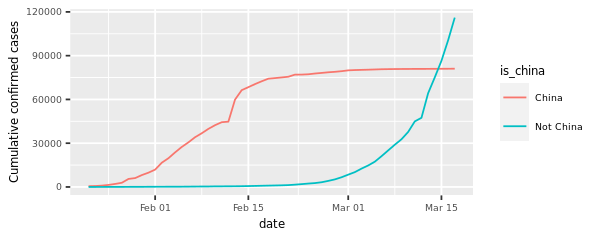

In [ ]:
confirmed_cases_china_vs_world <- read_csv('datasets/confirmed_cases_china_vs_world.csv')
glimpse(confirmed_cases_china_vs_world)

plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(x=date, y=cum_cases, group=is_china, color=is_china)) +
  ylab("Cumulative confirmed cases") + 
  theme(text=element_text(size=7))

plt_cum_confirmed_cases_china_vs_world

<p>There were a couple of other landmark events that happened during the outbreak. For example, the huge jump in the China line on February 13, 2020 wasn't just a bad day regarding the outbreak; China changed the way it reported figures on that day (CT scans were accepted as evidence for COVID-19, rather than only lab tests).</p>

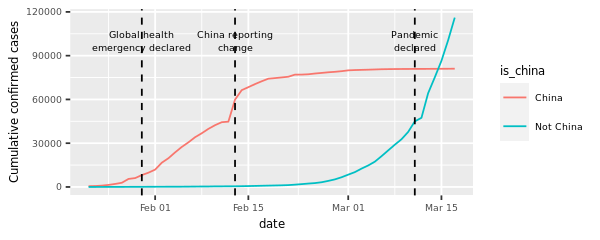

In [ ]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))

plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept=date), who_events, linetype="dashed") + 
  geom_text(aes(x=date, label=event), who_events, y=100000, size=2)

<p>There is a clear surge of cases around February 13, 2020, with the reporting change in China. However, a couple of days after, the growth of cases in China slows down.</p>
<p>From the plot below, the growth rate in China is slower than linear. That's great news because it indicates China has at least somewhat contained the virus in late February and early March.</p>

`geom_smooth()` using formula 'y ~ x'


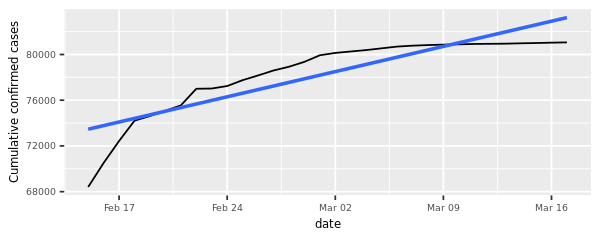

In [ ]:
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china=="China", date >= "2020-02-15")

ggplot(china_after_feb15, aes(x=date, y=cum_cases)) +
  geom_line() +
  geom_smooth(method="lm", se=FALSE) +
  ylab("Cumulative confirmed cases") +
  theme(text=element_text(size=7))

## 3. And the rest of the world?
<p>From the plot below, we can see a straight line does not fit well at all, and the rest of the world is growing much faster than linearly.</p>

`geom_smooth()` using formula 'y ~ x'


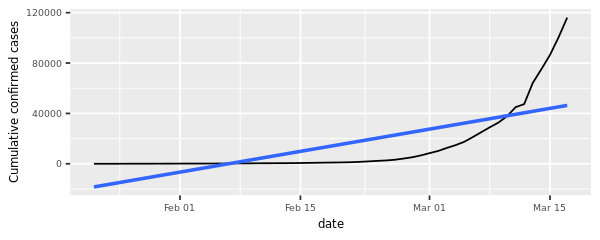

In [ ]:
not_china <- filter(confirmed_cases_china_vs_world, is_china=='Not China')

plt_not_china_trend_lin <- ggplot(not_china, aes(x=date, y=cum_cases)) +
  geom_line() +
  geom_smooth(method='lm', se=FALSE) +
  ylab("Cumulative confirmed cases") + 
  theme(text=element_text(size=7))

plt_not_china_trend_lin 

With the logarithmic scale, we get a much closer fit to the data. From a data science point of view, a good fit is great news. Unfortunately, from a public health point of view, that means that cases of COVID-19 in the rest of the world are growing at an exponential rate, which is terrible news.

`geom_smooth()` using formula 'y ~ x'


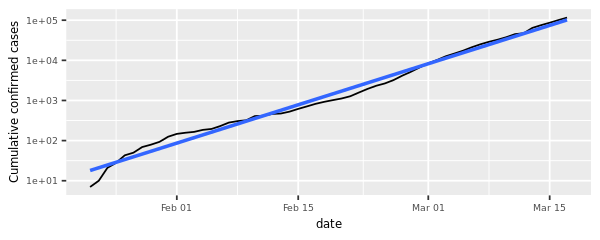

In [ ]:
plt_not_china_trend_lin + 
  scale_y_log10()

## 4. Which countries outside of China have been hit hardest?
Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea) in the above table. Four of the listed countries (France, Germany, Italy, and Spain) are in Europe and share borders.

In [ ]:
confirmed_cases_by_country <- read_csv("datasets/confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)

top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases=max(cum_cases)) %>%
  top_n(7, total_cases)

top_countries_by_total_cases

Parsed with column specification:
cols(
  country = col_character(),
  province = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)


Rows: 13,272
Columns: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua ...
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-...
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


`summarise()` ungrouping output (override with `.groups` argument)


country,total_cases
<chr>,<dbl>
France,7699
Germany,9257
Iran,16169
Italy,31506
"Korea, South",8320
Spain,11748
US,6421


Parsed with column specification:
cols(
  country = col_character(),
  date = col_date(format = ""),
  cum_cases = col_double()
)


Rows: 2,030
Columns: 3
$ country   <chr> "Germany", "Iran", "Italy", "Korea, South", "Spain", "US"...
$ date      <date> 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-...
$ cum_cases <dbl> 16, 0, 3, 31, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, ...


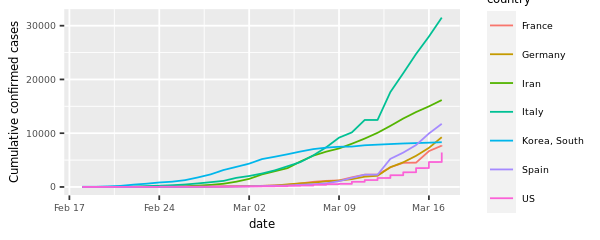

In [ ]:
confirmed_cases_top7_outside_china = read_csv('datasets/confirmed_cases_top7_outside_china.csv')
glimpse(confirmed_cases_top7_outside_china)

ggplot(confirmed_cases_top7_outside_china) + 
    geom_line(aes(x=date, y=cum_cases, group=country, color=country)) +
    ylab("Cumulative confirmed cases") + 
    theme(text=element_text(size=7))